# Рубежный контроль №1 по курсу «Методы машинного обучения»

Кузьмин Роман, ИУ5-25М


## Вариант задания
| Номер варианта  | Задание 1 | Задание 2 | Доп. требование |
|-----------------|-----------|-----------|-----------|
|          6      |      6    |      26   |      для произвольной колонки данных построить парные диаграммы (pairplot)   |

## Импорт библиотек

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import seaborn as sns
import scipy.stats as stats

# Задание 1. Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения средним значением.

Для заполнения пропуска выбрал датасет с Kaggle, содержащий 1000+ моделей смартфонов на март 2024. Датасет содержит их технические характеристики, цену и рейтинг

In [11]:
# Загрузка датасета
df = pd.read_csv('Smartphone_2024.csv', index_col=0)
df.head(10)

,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
0,iQOO Z9 5G,"₹19,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 44W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v14
1,Nothing Phone 2a,"₹23,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,Android v14,No FM Radio
2,Vivo V30 Pro 5G,"₹41,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Memory Card Not Supported,Android v14
3,Vivo V30 5G,"₹33,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Memory Card Supported,Android v14
4,Realme 12 Plus 5G,"₹19,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 2 TB",Android v14
5,Oppo F25 Pro 5G,"₹23,999",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,"Memory Card (Hybrid), upto 2 TB",Android v14
6,Samsung Galaxy F15 5G,"₹12,999",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6100 Plus, Octa Core, 2.2 GHz Processor","4 GB RAM, 128 GB inbuilt",6000 mAh Battery with 25W Fast Charging,"6.45 inches, 1080 x 2340 px, 90 Hz Display wit...",50 MP + 5 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v14
7,OnePlus Nord CE 3 5G,"₹22,429",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 782G, Octa Core, 2.7 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v13
8,Xiaomi Redmi Note 13 Pro 5G,"₹23,630",NaN,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Snapdragon 7s Gen 2, Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",5100 mAh Battery with 67W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,No FM Radio
9,Motorola Moto G34 5G (8GB RAM + 128GB),"₹11,999",77.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.5 inches, 720 x 1600 px, 120 Hz Display with...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v14


Проверим датасет на наличие пропусков в данных

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            1020 non-null   object 
 1   Price            1020 non-null   object 
 2   Rating           443 non-null    float64
 3   Specification    1020 non-null   object 
 4   Processor        1020 non-null   object 
 5   RAM              1020 non-null   object 
 6   Battery          1020 non-null   object 
 7   Display          1020 non-null   object 
 8   Camera           1020 non-null   object 
 9   Memory           1003 non-null   object 
 10  OperatingSystem  976 non-null    object 
dtypes: float64(1), object(10)
memory usage: 95.6+ KB


В числовом признаке Rating много пропусков, заполним их средним значением

In [7]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imputer = SimpleImputer(strategy=strategy_param,
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)

    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]

    return all_data.reshape((size,)), filled_data, missed_data

In [9]:
all_data, filled_data, missed_data = impute_column(df, 'Rating', 'mean')

Заменяем исходный столбец на него же с заполненными пропусками

In [12]:
df['Rating'] = all_data
df.head(10)

,Model,Price,Rating,Specification,Processor,RAM,Battery,Display,Camera,Memory,OperatingSystem
0,iQOO Z9 5G,"₹19,999",71.065463,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7200, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 44W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v14
1,Nothing Phone 2a,"₹23,999",71.065463,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 7200 Pro, Octa Core, 2.8 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 45W Fast Charging,"6.7 inches, 1084 x 2412 px, 120 Hz Display wit...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,Android v14,No FM Radio
2,Vivo V30 Pro 5G,"₹41,999",71.065463,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 8200, Octa Core, 3.1 GHz Processor","8 GB RAM, 256 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,Memory Card Not Supported,Android v14
3,Vivo V30 5G,"₹33,999",71.065463,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 7 Gen3, Octa Core, 2.63 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.78 inches, 1260 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP Dual Rear & 50 MP Front Camera,Memory Card Supported,Android v14
4,Realme 12 Plus 5G,"₹19,999",71.065463,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.67 inches, 1080 x 2400 px, 120 Hz Display wi...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 2 TB",Android v14
5,Oppo F25 Pro 5G,"₹23,999",71.065463,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 7050, Octa Core, 2.6 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 67W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",64 MP + 8 MP + 2 MP Triple Rear & 32 MP Front ...,"Memory Card (Hybrid), upto 2 TB",Android v14
6,Samsung Galaxy F15 5G,"₹12,999",75.000000,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6100 Plus, Octa Core, 2.2 GHz Processor","4 GB RAM, 128 GB inbuilt",6000 mAh Battery with 25W Fast Charging,"6.45 inches, 1080 x 2340 px, 90 Hz Display wit...",50 MP + 5 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v14
7,OnePlus Nord CE 3 5G,"₹22,429",71.065463,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 782G, Octa Core, 2.7 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 80W Fast Charging,"6.7 inches, 1080 x 2412 px, 120 Hz Display wit...",50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...,"Memory Card (Hybrid), upto 1 TB",Android v13
8,Xiaomi Redmi Note 13 Pro 5G,"₹23,630",71.065463,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster","Snapdragon 7s Gen 2, Octa Core, 2.4 GHz Processor","8 GB RAM, 128 GB inbuilt",5100 mAh Battery with 67W Fast Charging,"6.67 inches, 1220 x 2712 px, 120 Hz Display wi...",200 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...,Android v13,No FM Radio
9,Motorola Moto G34 5G (8GB RAM + 128GB),"₹11,999",77.000000,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi","Snapdragon 695, Octa Core, 2.2 GHz Processor","8 GB RAM, 128 GB inbuilt",5000 mAh Battery with 18W Fast Charging,"6.5 inches, 720 x 1600 px, 120 Hz Display with...",50 MP + 2 MP Dual Rear & 16 MP Front Camera,"Memory Card (Hybrid), upto 1 TB",Android v14


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Model            1020 non-null   object 
 1   Price            1020 non-null   object 
 2   Rating           1020 non-null   float64
 3   Specification    1020 non-null   object 
 4   Processor        1020 non-null   object 
 5   RAM              1020 non-null   object 
 6   Battery          1020 non-null   object 
 7   Display          1020 non-null   object 
 8   Camera           1020 non-null   object 
 9   Memory           1003 non-null   object 
 10  OperatingSystem  976 non-null    object 
dtypes: float64(1), object(10)
memory usage: 95.6+ KB


Как можно видеть, пропуски в признаки Rating были заполнены средним значением

# Задание 2. Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе правила трех сигм.

Этот датасет с Kaggle описывает красные сорта португальского вина "Vinho Verde". Набор данных описывает количество различных химических веществ, присутствующих в вине, и их влияние на его качество.

In [15]:
# Загрузка датасета
df = pd.read_csv('WineQT.csv', index_col='Id')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7


Функция для построения нескольких графиков

In [25]:
def diagnostic_plots(df, variable):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    plt.show()

Выявляем при помощи графиков выбросы в признаке fixed acidity

<ipython-input-25-9418bd9ace89>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


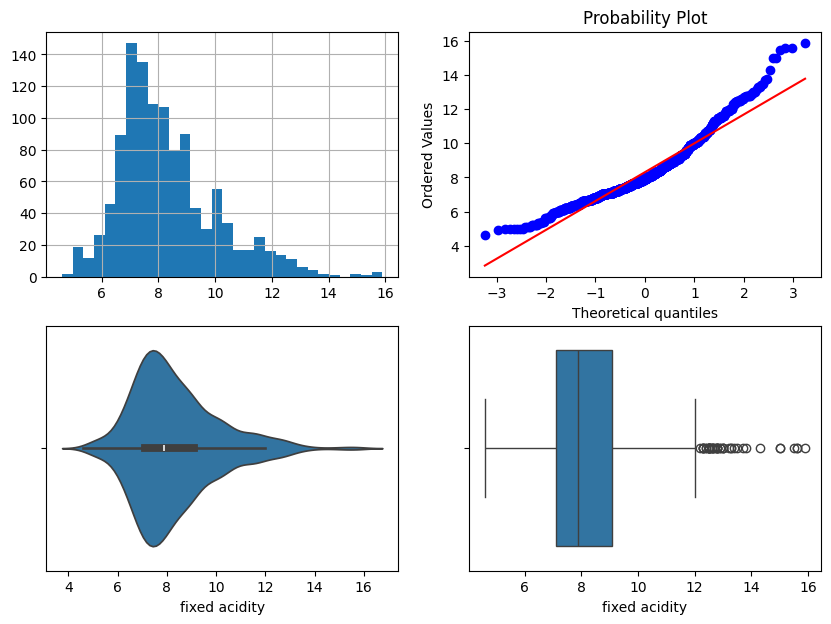

In [26]:
diagnostic_plots(df, 'fixed acidity')

In [27]:
df.shape

(1143, 12)

Удаляем выбросы. Как можно увидеть, были удаленны только далекие от медианы выбросы, а группа ближайших (на ящике с усами) - осталась. Это показывает, что распределение было немного ассиметричным (наклоненным). Но метод сработал хорошо и не удалил группу значений, не являющуюся выбросами

<ipython-input-25-9418bd9ace89>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


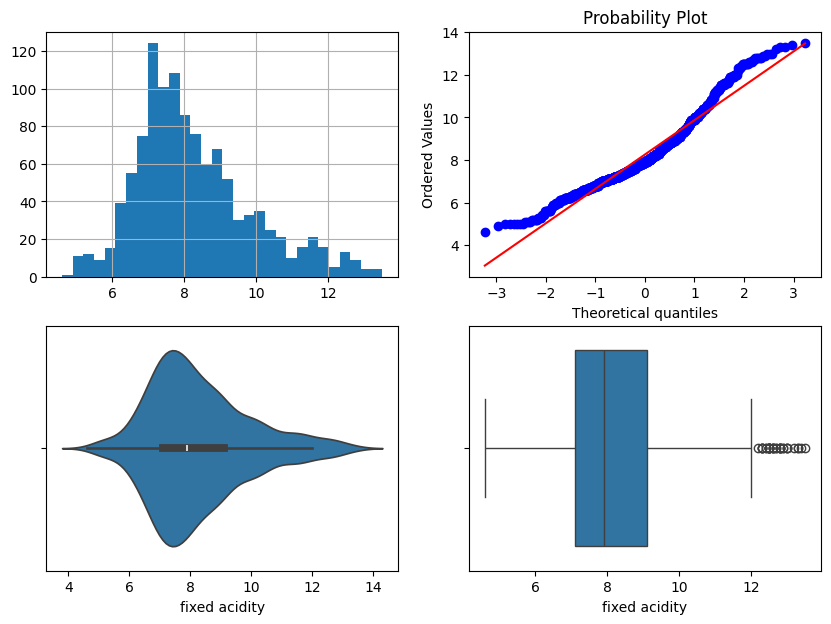

In [30]:
col = 'fixed acidity'

# Вычисление верхней и нижней границы
lower_boundary = df[col].mean() - (3 * df[col].std())
upper_boundary = df[col].mean() + (3 * df[col].std())
# Флаги для удаления выбросов
outliers_temp = np.where(df[col] > upper_boundary, True,
                          np.where(df[col] < lower_boundary, True, False))
# Удаление данных на основе флага
data_trimmed = df.loc[~(outliers_temp), ]

diagnostic_plots(data_trimmed, col)

Количество строк уменьшилось

In [31]:
data_trimmed.shape

(1134, 12)

# Построение графика по варианту

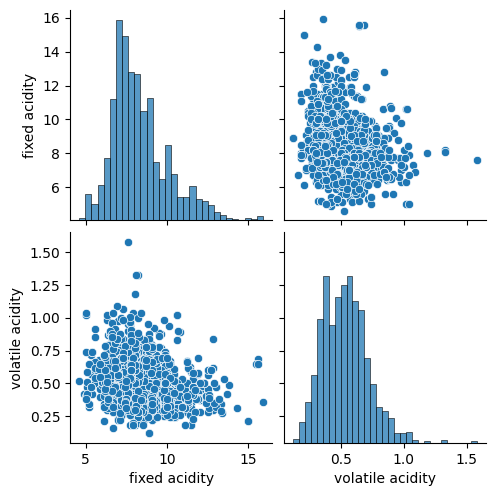

In [32]:
sns.pairplot(df, vars=['fixed acidity', 'volatile acidity'])